In [ ]:
# 4 transformers
# ax.transData -- looks a xlim and ylim
# ax.transAxes -- 0 to 1 (left to right, bottom to top)
# ax.transFigure -- 0 to 1 (left to right, bottom to top)
# None -- pixels ("dots")

In [3]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
eur.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

/tmp/ipykernel_42206/3088248889.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_before = eur.centroid


<AxesSubplot:>

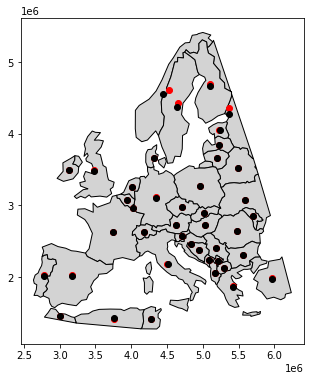

In [7]:
from shapely.geometry import Polygon, box, Point
import geopandas as gpd

# global GeoDataFrame
path = gpd.datasets.get_path("naturalearth_lowres")
df = gpd.read_file(path).set_index("name")

# Europe GeoSeries
eur_window = box(-10.67, 34.5, 31.55, 71.05)
eur = df.intersection(eur_window)
eur = eur[~eur.is_empty] # why filter?

# centroid -- which line causes the error?
centroids_before = eur.centroid
eur = eur.to_crs("EPSG:3035")
centroids_after = eur.centroid

# visualize
ax = eur.plot(color="lightgray", edgecolor="k", figsize=(12,6))
centroids_before.to_crs(eur.crs).plot(color="r", ax=ax)
centroids_after.plot(color="k", ax=ax)

# Area

In [15]:
# Europe GeoSeries
eur_window = box(-10.67, 34.5, 31.55, 71.05)
eur = df.intersection(eur_window)
eur = eur[~eur.is_empty]
#eur.area

eur2 = eur.to_crs("EPSG:3035")

eur2.area # caveat: this is there area within the cropped window
sq_mi = eur2.area / 1000 / 1000 / 2.59
sq_mi.sort_values(ascending=False)

name
France              216045.735320
Spain               193941.416516
Sweden              173962.955903
Germany             138002.030052
Finland             131750.182704
Norway              126885.828356
Italy               121659.867544
Poland              119844.344075
Ukraine             110345.741832
United Kingdom       96519.589998
Romania              92025.972522
Turkey               85632.236650
Algeria              78882.882393
Belarus              78739.245551
Russia               78170.023756
Greece               50946.870966
Bulgaria             42554.046136
Portugal             36065.021674
Hungary              35704.295877
Austria              32842.862855
Czechia              31354.126319
Serbia               29493.813018
Tunisia              25280.702563
Latvia               24680.969176
Lithuania            24644.688797
Ireland              22568.405096
Croatia              22212.141886
Bosnia and Herz.     19538.365073
Slovakia             18172.796262
Switzerla

# Map of Madison

72.0


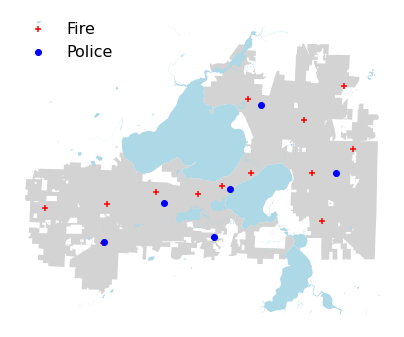

In [39]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 16

# load data
city = gpd.read_file("City_Limit.zip").to_crs("epsg:32616")
water = gpd.read_file("Lakes_and_Rivers.zip").to_crs(city.crs)
fire = gpd.read_file("Fire_Stations.zip").to_crs(city.crs)
police = gpd.read_file("Police_Stations.zip").to_crs(city.crs)

# plotting
ax = city.plot(color="lightgray", figsize=(7,7))
water.plot(color="lightblue", ax=ax)
fire.plot(color="red", marker="+", ax=ax, label="Fire")
police.plot(color="blue", ax=ax, label="Police")
ax.set_axis_off()
plt.legend(frameon=False, loc="upper left")

# saving different resolutions
print(ax.get_figure().dpi)
ax.get_figure().savefig("low.png", dpi=20)
ax.get_figure().savefig("high.png", dpi=300)

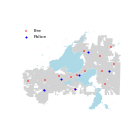

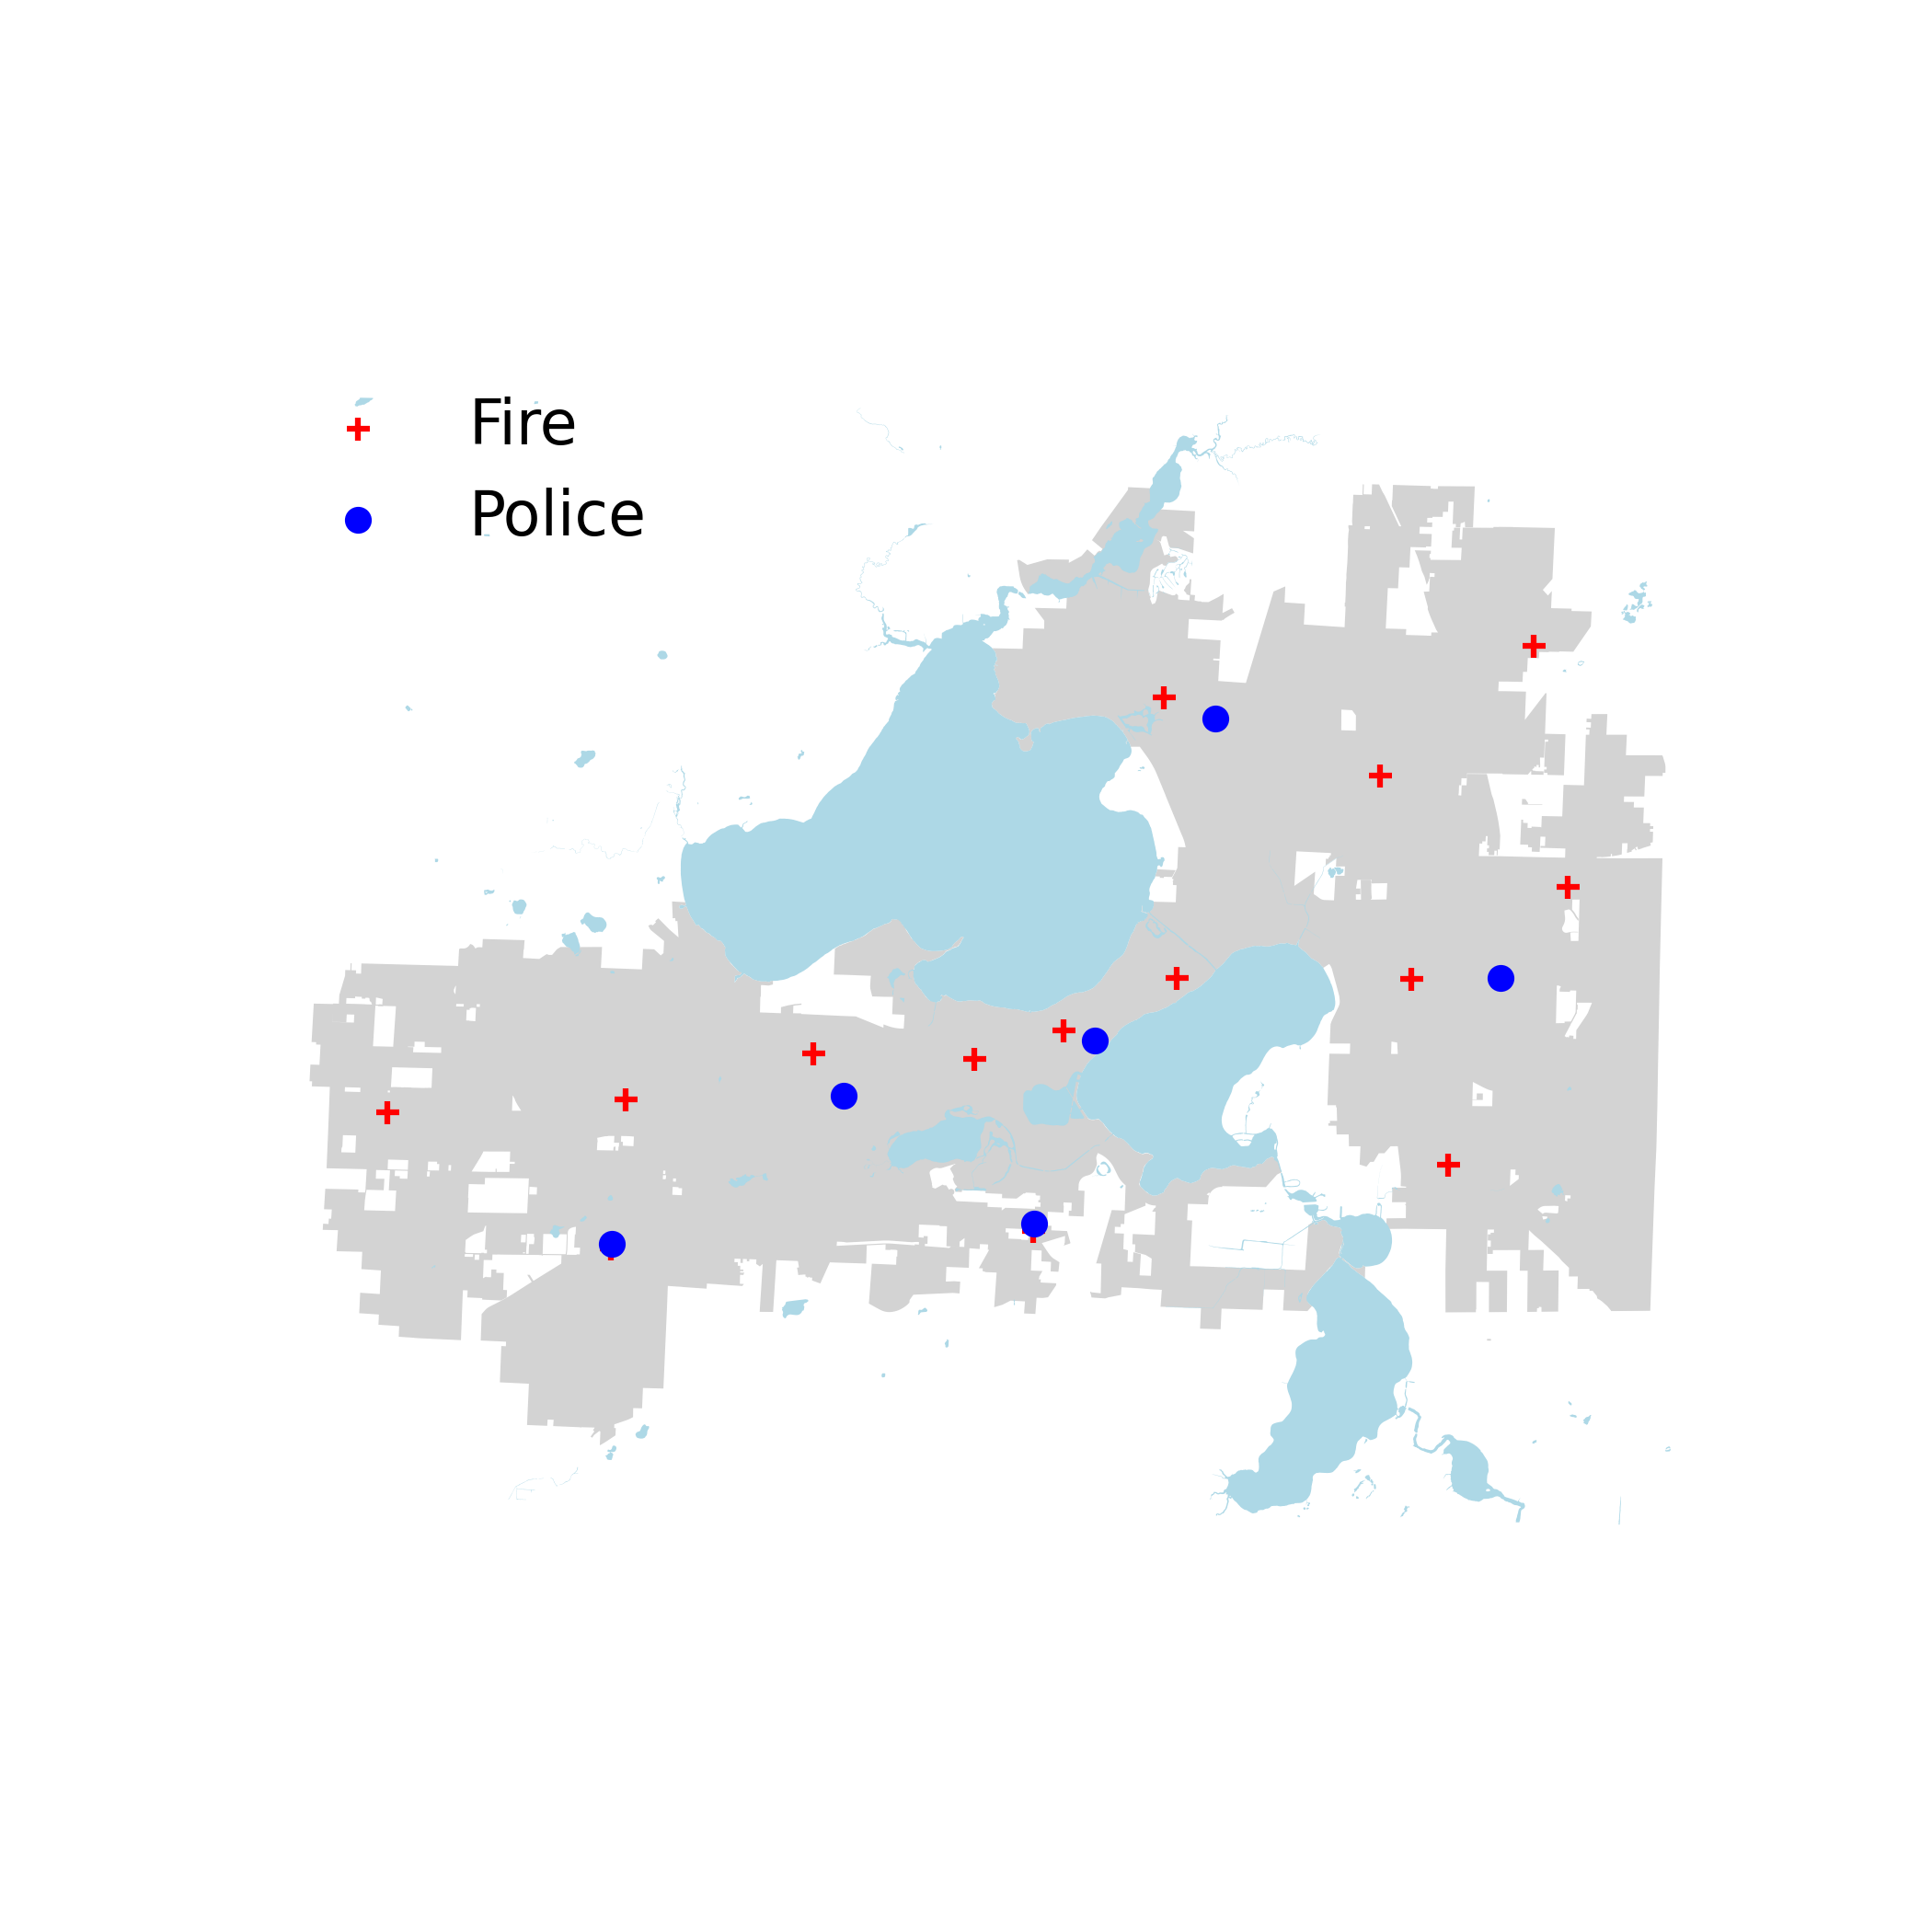

In [41]:
from IPython.core.display import Image, display
display(Image("low.png", width=600))
display(Image("high.png", width=600))

In [17]:
# 1. map/figure resolution
# 2. geojson
# 3. computation: how many fire departments are "near" lakes?

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
url = "https://opendata.arcgis.com/datasets/c46082b091a941f8b2ded1dd115a1a05_8.geojson"
df = gpd.read_file(url)
df.head()

,OBJECTID,SHAPESTArea,SHAPESTLength,geometry
0,1,39958.447479,782.327754,"POLYGON ((-89.49887 43.08164, -89.49899 43.081..."
1,2,31880.854431,797.842450,"POLYGON ((-89.48482 43.08431, -89.48477 43.084..."
2,3,3699.958649,814.712984,"POLYGON ((-89.51718 43.10277, -89.51707 43.102..."
3,4,1174.258911,797.157265,"POLYGON ((-89.51869 43.10268, -89.51873 43.102..."
4,5,40693.432434,848.431555,"POLYGON ((-89.54302 43.10091, -89.54302 43.100..."


In [45]:
df.to_file("mycopy.shp")

/tmp/ipykernel_42206/1344334088.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file("mycopy.shp")


<AxesSubplot:>

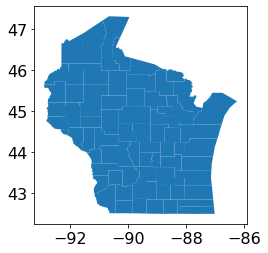

In [46]:
gpd.read_file("https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/State_County/MapServer/1/query?where=STATE%3D055&text=&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=geojson").plot()

<AxesSubplot:>

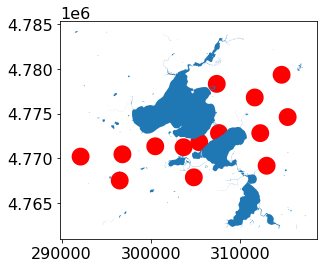

In [52]:
ax = fire.buffer(1000).plot(color="r")
water.plot(ax=ax)

In [56]:
water.unary_union # combine shapes from all rows into one big shape (MultiPolygon)

In [58]:
# DataFrame of stations within 1km of water
fire[fire.buffer(1000).intersects(water.unary_union)]

,OBJECTID,MCD,EMS,LONG_NAME,SHORT_NAME,FIRE_STATI,FIRE_STA_1,COMMENT,ADDRESS,URL,geometry
0,40,CITY OF MADISON,Y,Fire Station # 7,# 7,7,A,Active,1810 McKenna Blvd,http://www.cityofmadison.com/fire/stations/sta...,POINT (296500.973 4767501.373)
4,44,CITY OF MADISON,Y,Fire Station # 4,# 4,4,A,Active,1437 Monroe St,http://www.cityofmadison.com/fire/stations/sta...,POINT (303650.593 4771228.643)
5,45,CITY OF MADISON,N,Fire Station # 1,# 1,1,A,Active,316 W Dayton St,http://www.cityofmadison.com/fire/stations/sta...,POINT (305406.146 4771782.983)
6,46,CITY OF MADISON,Y,Fire Station # 3,# 3,3,A,Active,1217 Williamson St,http://www.cityofmadison.com/fire/stations/sta...,POINT (307618.590 4772815.951)
7,47,CITY OF MADISON,Y,Fire Station # 10,# 10,10,A,Active,1517 Troy Dr,http://www.cityofmadison.com/fire/stations/sta...,POINT (307367.543 4778324.864)
10,50,CITY OF MADISON,N,Fire Station # 11,# 11,11,A,Active,4011 Morgan Way,http://www.cityofmadison.com/fire/stations/sta...,POINT (314628.203 4779340.855)
13,53,CITY OF MADISON,N,Fire Station #14,# 14,14,P,Proposed,3218 Dairy Drive,None,POINT (312952.019 4769155.125)


In [48]:
water

,OBJECTID,SHAPESTAre,SHAPESTLen,geometry
0,1,39958.447479,782.327754,"POLYGON ((296586.503 4772912.001, 296575.468 4..."
1,2,31880.854431,797.842450,"POLYGON ((297739.320 4773174.340, 297726.376 4..."
2,3,3699.958649,814.712984,"POLYGON ((295166.302 4775303.433, 295160.970 4..."
3,4,1174.258911,797.157265,"POLYGON ((295043.161 4775296.300, 295045.784 4..."
4,5,40693.432434,848.431555,"POLYGON ((293057.855 4775159.268, 293057.962 4..."
...,...,...,...,...
184,185,4346.270508,246.376194,"POLYGON ((295383.999 4775907.438, 295381.695 4..."
185,186,3036.646973,469.698515,"POLYGON ((295261.808 4775857.924, 295260.549 4..."
186,187,59661.897186,9009.097855,"POLYGON ((296007.266 4775548.429, 296007.339 4..."
187,188,20779.310974,2141.678797,"POLYGON ((295398.987 4775403.595, 295402.573 4..."


# Animation

In [59]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

def draw_frame(frame_number):
    pass

#FuncAnimation(fig, draw_frame) # loop: call draw_frame for each frame number

TypeError: __init__() missing 2 required positional arguments: 'fig' and 'func'